#imports

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns 
np.random.seed(0) 
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout

#dataset

In [2]:
# Chargement des données MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

#convertir les images en noire sur blanc 
x_train = 255 - x_train
x_test = 255 - x_test

# Convertir les pixels de [0, 255] a [0, 1]
x_train = x_train / 255
x_test = x_test / 255

# supprimer les niveau de gris tout ce qui est dessus de 128 est considerer comme blanc et tt ce qui 
# en dessous de 128 considirer comme noire 
x_train = (x_train > 0.5).astype(np.uint8)
x_test = (x_test > 0.5).astype(np.uint8)

#print(x_train[0])

#shape pour x_train et y_train // x_test et y_test // (60000, 28, 28) (60000,) // (10000, 28, 28) (10000,)
print("shape de data set x train et y train x test et y test")
print(x_train.shape , y_train.shape)
print(x_test.shape , y_test.shape)

print("_________________________________________")

# Sélection des exemples de chiffres 5 dans les données d'entraînement et de test

x_train_5 = x_train[y_train == 5]
y_train_5 = y_train[y_train == 5]
x_test_5 = x_test[y_test == 5]
y_test_5 = y_test[y_test == 5]

#shape pour x_train_5 et y_train_5 // x_test_5 et y_test_5 // (5421, 28, 28) (5421,) // (892, 28, 28) (892,)
print("shape de data set x train de 5 et y train de 5 x test et y test")
print(x_train_5.shape , y_train_5.shape)

print(x_test_5.shape , y_test_5.shape)

print("_________________________________________")

# deviser chaque images de dataset train et test en 16 parties de 7*7 pixels 
x_train_regions = []
x_test_regions = []

for i in range(x_train.shape[0]):
    regions = [x_train[i, x:x+7, y:y+7] for x in range(0, 28, 7) for y in range(0, 28, 7)]
    x_train_regions.append(regions)
    
for i in range(x_test.shape[0]):
    regions = [x_test[i, x:x+7, y:y+7] for x in range(0, 28, 7) for y in range(0, 28, 7)]
    x_test_regions.append(regions)
    
# mettre les nouvelle liste sous forme d'un vecteur 
x_train_regions = np.array(x_train_regions)
x_test_regions = np.array(x_test_regions)

#shape de region
print("shape de regions ")
print(x_train_regions.shape , y_train.shape)
print(x_test_regions.shape , y_test.shape)

print("_________________________________________")
  
# traitement d'image ou calculé le pourcentage du noire sur chaque partie de 7*7 pixels
x_train_percentages = []
x_test_percentages = []

for i in range(x_train_regions.shape[0]):
    percentages = [[np.mean(region == 0) for region in row] for row in np.split(x_train_regions[i], 4)]
    x_train_percentages.append(percentages)
    
for i in range(x_test_regions.shape[0]):
    percentages = [[np.mean(region == 0) for region in row] for row in np.split(x_test_regions[i], 4)]
    x_test_percentages.append(percentages)

# convertir le pourcentage en vecteur 
x_train_percentages = np.array(x_train_percentages)
x_test_percentages = np.array(x_test_percentages)

#shape de pourcentage
print("shape de pourcentage")
print(x_train_percentages.shape)
print(x_test_percentages.shape)

print("_________________________________________")
print("exemple d'une matrice de 16 partie avec du pourcentage ")
print(x_train_percentages[3])
print("_________________________________________")


#juste pour voire un des libelles de 5 
print("Label : ",y_train_5[2])

11490434/11490434 [==============================] - 0s 0us/step
shape de data set x train et y train x test et y test
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
_________________________________________
shape de data set x train de 5 et y train de 5 x test et y test
(5421, 28, 28) (5421,)
(892, 28, 28) (892,)
_________________________________________
shape de regions 
(60000, 16, 7, 7) (60000,)
(10000, 16, 7, 7) (10000,)
_________________________________________
shape de pourcentage
(60000, 4, 4)
(10000, 4, 4)
_________________________________________
exemple d'une matrice de 16 partie avec du pourcentage 
[[0.         0.         0.10204082 0.        ]
 [0.         0.         0.44897959 0.        ]
 [0.         0.40816327 0.12244898 0.        ]
 [0.         0.26530612 0.         0.        ]]
_________________________________________
Label :  5


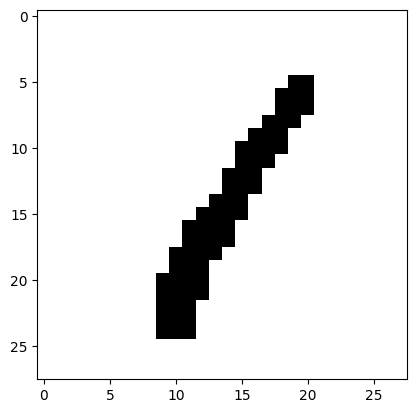

In [3]:
# Affichage une des images à l'aide de Matplotlib

plt.imshow(x_train[3], cmap='gray')
plt.show()

#Neural Net

In [6]:
from keras.layers import Flatten
tf.compat.v1.reset_default_graph()

model = Sequential()

model.add(Flatten(input_shape=(4,4)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

#fit 


In [7]:
# Entraînement du modèle
# on passe ici les resultat des pourcentage obtenue x_train_percentages comme train pour notre modele 
x_train_5_percentages = x_train_percentages[y_train == 5]
y_train_5_only = np.ones(x_train_5_percentages.shape[0])  # set the output to 1 for all 5s

history = model.fit(x_train_percentages, y_train, epochs=5, batch_size=32, validation_split=0.2)

"test_loss, test_acc = model.evaluate(x_test_percentages, y_test_5)"

"print('Test accuracy:', test_acc)"



Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: -305303.6562 - accuracy: 0.1139 - val_loss: -1472978.2500 - val_accuracy: 0.1060
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: -7458687.0000 - accuracy: 0.1140 - val_loss: -17262464.0000 - val_accuracy: 0.1060
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: -37853800.0000 - accuracy: 0.1140 - val_loss: -65003560.0000 - val_accuracy: 0.1060
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: -108872312.0000 - accuracy: 0.1140 - val_loss: -162095680.0000 - val_accuracy: 0.1060
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: -237636400.0000 - accuracy: 0.1140 - val_loss: -326820928.0000 - val_accuracy: 0.1060


"print('Test accuracy:', test_acc)"

#evaluation

In [ ]:
test_loss , test_acc = model.evaluate(x_test_percentages,y_test)
print("test loss = {}, test accuracy ={}".format(test_loss,test_acc))

313/313 [==============================] - 1s 1ms/step - loss: -451551680.0000 - accuracy: 0.1135
test loss = -451551680.0, test accuracy =0.11349999904632568
